<a href="https://colab.research.google.com/github/sumaiya08/medicaldata/blob/master/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

In [3]:
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id='eicudata'

Frequency of hospital admission

In [0]:
%%bigquery --project $project_id freq
select uniquepid, count(patienthealthsystemstayid) as numvisit
from `physionet-data.eicu_crd.patient` 
group by uniquepid
order by uniquepid

In [38]:
freq
print(len(freq))

139367


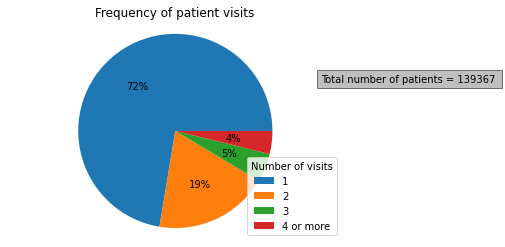

In [45]:
a=freq.numvisit[freq.numvisit==1].count()
b=freq.numvisit[freq.numvisit==2].count()
c=freq.numvisit[freq.numvisit==3].count()
d=freq.numvisit[freq.numvisit>=4].count()
visits = [a,b,c,d]


labels = '1','2','3','4 or more'
labels2= 'Total number of patients'
plt.pie(visits,autopct='%1.0f%%')
plt.title('Frequency of patient visits')
plt.legend(labels,title='Number of visits', loc ="lower right")
plt.text(1.5,0.5,'Total number of patients = 139367 ',bbox=dict(facecolor='grey',alpha=0.5))
plt.axis('equal')
plt.show()

In [0]:
%%bigquery --project $project_id patient
select * from `physionet-data.eicu_crd.patient`;



ValueError: ignored

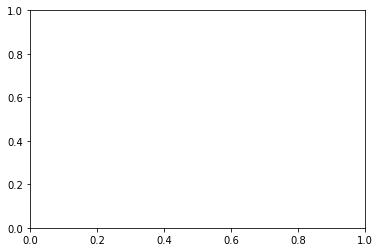

In [73]:
ages=["15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85+"]
alive = patient[patient.unitdischargestatus=='Alive']
expired = patient[patient.unitdischargestatus=='Expired']
zero = alive.unitdischargestatus.count()
zero1=expired.unitdischargestatus.count()
values = [zero,zero1]
index = np.arange(len(ages))
score_label = np.arange(0,12500,2500)
width = 0.30

plt.bar(index,values,width,color="blue",label="Alive")
plt.bar(index,zero1,width,color="red",label="Expired",bottom=expired)
plt.show()
